<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/decision_trees/classification/03_Information_Gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etap4. Odcinek2: Zysk informacyjny**

In [ ]:
print("#############################################")
print("Etap4. Odcinek2: Zysk informacyjny.")

print("Zysk informacyjny to miara dzięki której wiem, które zmienne wybrać jako następne do podziału zbioru.")
print("Jest liczony w oparciu o kryterium podziału, czyli albo wskaźnik Giniego albo entropię.")
print("Obliczymy w oparciu o entropię.")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#############################################
Etap4. Odcinek2: Zysk informacyjny.
Zysk informacyjny to miara dzięki której wiem, które zmienne wybrać jako następne do podziału zbioru.
Jest liczony w oparciu o kryterium podziału, czyli albo wskaźnik Giniego albo entropię.
Obliczymy w oparciu o entropię.


In [ ]:
print("Tutaj x oznacza udział klasy w i-tym węźle, czyli jest ułamkiem.")
print("A właściwie x jest listą ułamków.")
def entropy(x):
  return -np.sum(x * np.log2(x))

Tutaj x oznacza udział klasy w i-tym węźle, czyli jest ułamkiem.
A właściwie x jest listą ułamków.


In [ ]:
print("\nPrzykłady obliczania entropii dla dwóch klas (klasyfikacja binarna).")
print("Im bardziej pierwsza klasa zwiększa swój udział tym bardziej entropia spada.")
print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))


Przykłady obliczania entropii dla dwóch klas (klasyfikacja binarna).
Im bardziej pierwsza klasa zwiększa swój udział tym bardziej entropia spada.
1.0
0.7219280948873623
0.28639695711595625


In [ ]:
print("Niech p oznacza udział pierwszej klasy w próbce.")
p = np.arange(0.01, 1.0, 0.01)
print("p =", p)
print("Niech q oznacza udział drugiej klasy w próbce.")
q = 1 - p
print("q =", q)
pq = np.c_[p, q]
print("Lista par udziałów pierwszej i drugiej klasy w danej próbce =")
print(pq[:5])

Niech p oznacza udział pierwszej klasy w próbce.
p = [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]
Niech q oznacza udział drugiej klasy w próbce.
q = [0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.2

In [ ]:
entropies = [entropy(pair) for pair in pq]
print("Entropie dla wszystkich par z tablicy pq")
entropies

Entropie dla wszystkich par z tablicy pq


[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812,
 0.499915958164528,
 0.5293608652873644,
 0.5574381850279891,
 0.584238811642856,
 0.6098403047164005,
 0.6343095546405662,
 0.6577047787442195,
 0.6800770457282799,
 0.7014714598838974,
 0.7219280948873623,
 0.7414827399312737,
 0.7601675029619657,
 0.7780113035465377,
 0.7950402793845222,
 0.8112781244591328,
 0.8267463724926178,
 0.8414646362081757,
 0.8554508105601307,
 0.8687212463394046,
 0.8812908992306927,
 0.8931734583778567,
 0.9043814577244939,
 0.9149263727797275,
 0.9248187049730301,
 0.9340680553754911,
 0.9426831892554923,
 0.9506720926870659,
 0.9580420222262995,
 0.9647995485050872,
 0.9709505944546686,
 0.976500468757824,
 0.9814538950336537,
 0.9858150371789198,
 0.9895875212220556,
 0.9927744539878083,
 0.9953784388202257,
 0.9974015885677396,
 0.9988455

Wykres entropii w zależności od p


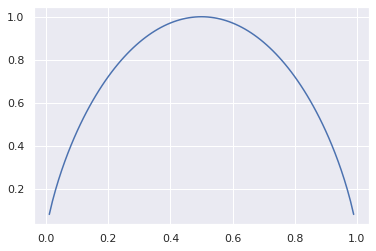

In [ ]:
print("Wykres entropii w zależności od p")
plt.plot(p, entropies)

# **Etap4. Odcinek3: Zysk informacyjny - przykład**

In [ ]:
print("#############################################")
print("Etap4. Odcinek3: Zysk informacyjny - przykład.")

print("W tabeli historyczne info czy bank udzielił pożyczki czy nie")

#############################################
Etap4. Odcinek3: Zysk informacyjny - przykład.
W tabeli historyczne info czy bank udzielił pożyczki czy nie


### Rozważmy dane

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
### dla $p_{i}>0$ mamy $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział,
$m$ - liczba podziałów



In [ ]:
print("Entropia przed podziałem dla zmiennej 'Udzielenie pożyczki'.")
print("Jest blisko 1 bo wartości 6/10 i 4/10 są blisko rozłożenia po połowie 5/10 i 5/10.")
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

Entropia przed podziałem dla zmiennej 'Udzielenie pożyczki'.
Jest blisko 1 bo wartości 6/10 i 4/10 są blisko rozłożenia po połowie 5/10 i 5/10.


0.9709505944546686

### Rozkład zmiennej `Wiarygodność`.
Udział oznacza ile było takich wiarygodności w stosunku do wszystkich. Kolumna "udzielenie pożyczki = 0" to prawdopodobieństwo wylosowania klienta o danej wiarygodności, któremu nie udzielono pożyczki (analogicznie kolumna "udzielenie pożyczki = 1" oznacza, że mu udzielono)

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia obliczenia moje z definicji
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       |  $0 = 1 \cdot log_{2}1$
| średnia | 2/10   | 1/2                     | 1/2                     | $1 = \frac{1}{2} \cdot log_{2}({\frac{1}{2}}) + \frac{1}{2} \cdot log_{2}({\frac{1}{2}})$
| wysoka  | 3/10   | 0                       | 1                       | $0 = 1 \cdot log_{2}1$

Entropia po podziale

In [ ]:
print("Żeby policzyć entropię po podziale danej zmiennej, to mnożę udział przez entropię")
print("a potem dodaję te iloczyny.")
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

Żeby policzyć entropię po podziale danej zmiennej, to mnożę udział przez entropię
a potem dodaję te iloczyny.


0.2

In [ ]:
print("Aby wiedzieć po której zmiennej podzielić zbiór muszę zrobić powyższe kroki dla każdego atrybutu")
print("Teraz dla dochodu. Nie będziemy dla wszystkich atrybutów liczyć")

Aby wiedzieć po której zmiennej podzielić zbiór muszę zrobić powyższe kroki dla każdego atrybutu
Teraz dla dochodu. Nie będziemy dla wszystkich atrybutów liczyć


### Rozkład zmiennej  `Dochód`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia obliczenia moje z definicji............
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |$0 = 1 \cdot log_{2}1$
| sredni | 4/10   | 2/4                     | 2/4                     |$1 = \frac{2}{4} \cdot log_{2}({\frac{2}{4}}) + \frac{2}{4} \cdot log_{2}({\frac{2}{4}})$
| wysoki | 3/10   | 1/3                     | 2/3                     | $0.9183 = \frac{1}{3} \cdot log_{2}({\frac{1}{3}}) + \frac{2}{3} \cdot log_{2}({\frac{2}{3}})$

Entropia po podziale

In [ ]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

### Zysk Informacyjny

$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [ ]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855


In [ ]:
print("Ja obliczam zysk informacyjny dla zmiennej 'Liczba osób w gospodarstwie'.")

Ja obliczam zysk informacyjny dla zmiennej 'Liczba osób w gospodarstwie'.


### Rozkład zmiennej  `Liczba osób w gospodarstwie`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia obliczenia moje z definicji............
|--------|--------|-------------------------|-------------------------|----------|
| 1  | 2/10   | 1/2                       | 1/2                       |$1 = \frac{1}{2} \cdot log_{2}\frac{1}{2} + \frac{1}{2} \cdot log_2\frac{1}{2}$
| 2 | 1/10   | 0                     | 1                     |$0 = 1 \cdot log_{2}1$
| 3 | 3/10   | 2/3                     | 1/3                     | $0.9183 = \frac{2}{3} \cdot log_{2}({\frac{2}{3}}) + \frac{1}{3} \cdot log_{2}({\frac{1}{3}})$
| 4 | 3/10   | 2/3                     | 1/3                     | $0.9183 = \frac{2}{3} \cdot log_{2}({\frac{2}{3}}) + \frac{1}{3} \cdot log_{2}({\frac{1}{3}})$
| 5 | 1/10   | 1                     | 0                     | $0 = 1 \cdot log_{2}1$

Entropia po podziale

In [ ]:
entropia_liczba_osob_w_gospodarstwie = 2/10 * 1 + 1/10 * 0 + 3/10 * 0.9183 + 3/10 * 0.9183 + 1/10 * 0
entropia_liczba_osob_w_gospodarstwie

0.75098

In [ ]:
ig_liczba_osob_w_gospodarstwie = entropia - entropia_liczba_osob_w_gospodarstwie
print('Zysk informacyjny (IG): liczba osów w gospodarstwie:', ig_liczba_osob_w_gospodarstwie)
print("Największy zysk informacyjny jest dla wiarygodności więc dorzucam tą zmienną do podziału")

Zysk informacyjny (IG): liczba osów w gospodarstwie: 0.2199705944546686
Największy zysk informacyjny jest dla wiarygodności więc dorzucam tą zmienną do podziału
